What this notebook contain:
1. reading data from zip file
2. sampling data for class that have one sample in data
3. splitting data into training (80%)  and test (20%)
4. preprocessing
    a. lowercase
    b. tokenizing using word_tokenize by nltk
    c. remove stop words
    d. lemmatization
    e. remove empty element
    f. remove periods element
5. vocabulary creation: contain all words in corbus without duplicates

In [4]:
# Install required third-party libraries
# !pip install nltk

# Download necessary nltk data
# nltk.download('stopwords')

import zipfile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

stop_words_nltk = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Reading data

In [5]:
data = []

with zipfile.ZipFile("../data/training.zip", 'r') as z:
    for file_info in z.infolist():
        file_name = file_info.filename
        parts = file_name.strip().split('/')
        if parts[0] == 'training' and parts[-1] != '':
            with z.open(file_name) as file:
                content = file.read().decode('utf-8', errors='replace')
                data.append({'content': content, 'category': parts[1]})

data = pd.DataFrame(data)
data

,content,category
0,\n\r\nTHAI TIN EXPORTS FALL IN FEBRUARY\r\n\n ...,tin
1,"\n\r\nZAIRE ACCEPTS TIN-EXPORT QUOTA, ATPC SAY...",tin
2,\n\r\nECONOMIC SPOTLIGHT - BOLIVIA\r\n\n<AUTHO...,tin
3,\n\r\nTHAI TIN EXPORTS RISE IN JANUARY\r\n\n ...,tin
4,\n\r\nTIN PACT EXTENSION LIKELY - ITC DELEGATE...,tin
...,...,...
11408,\n\r\nU.K. CREDIT BUSINESS FALLS IN JANUARY\r\...,instal-debt
11409,\n\r\nU.S. CONSUMER CREDIT ROSE 1.77 BILLION D...,instal-debt
11410,\n\r\nU.S. FEB CONSUMER CREDIT ROSE 1.77 BILLI...,instal-debt
11411,\n\r\nU.S. CONSUMER CREDIT ROSE 536 MLN DLRS I...,instal-debt


# Splitting data
I will splitting data to train, dev, and test sets, ensuring all have same distribution. 

In [7]:
# splitting occuring an error:
# ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
# So I will duplicate the single instance

def sampling_data(data) -> pd.DataFrame:
    """Perform data sampling to address class imbalance in a dataset.

    Args:
        data (pd.DataFrame): The dataset to be sampled. 
        It must contain a 'category' column indicating the class labels.

    Returns:
        pd.DataFrame: A DataFrame containing the original data with additional 
        instances of minority class samples appended.
    """
    df_minority = data[data['category'].map(data['category'].value_counts()) == 1]
    return pd.concat([data, df_minority])


data = sampling_data(data)

In [8]:
data.shape

(11420, 2)

In [9]:
def split_create_dfs(X, y) -> tuple:
    """Split the data into training and testing sets and create DataFrames for each set.

    Args:
        X (DataFrame): The feature data.
        y (DataFrame): The target data.
        dist (bool, optional): If True, print class distribution information for each set. Defaults to False.

    Returns:
        tuple: A tuple containing the following elements in order:
            - train_data (DataFrame): DataFrame containing content, file_name, and category for the training set.
            - test_data (DataFrame): DataFrame containing content, file_name, and category for the testing set.
    """
    # Split the data into training (60%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # combine the content and category again into a DataFrame for each set:
    train_data = pd.DataFrame({'content': X_train, 'category': y_train})
    test_data = pd.DataFrame({'content': X_test, 'category': y_test})
    
    return train_data, test_data

train_data, test_data = split_create_dfs(X=data['content'], y=data['category'])

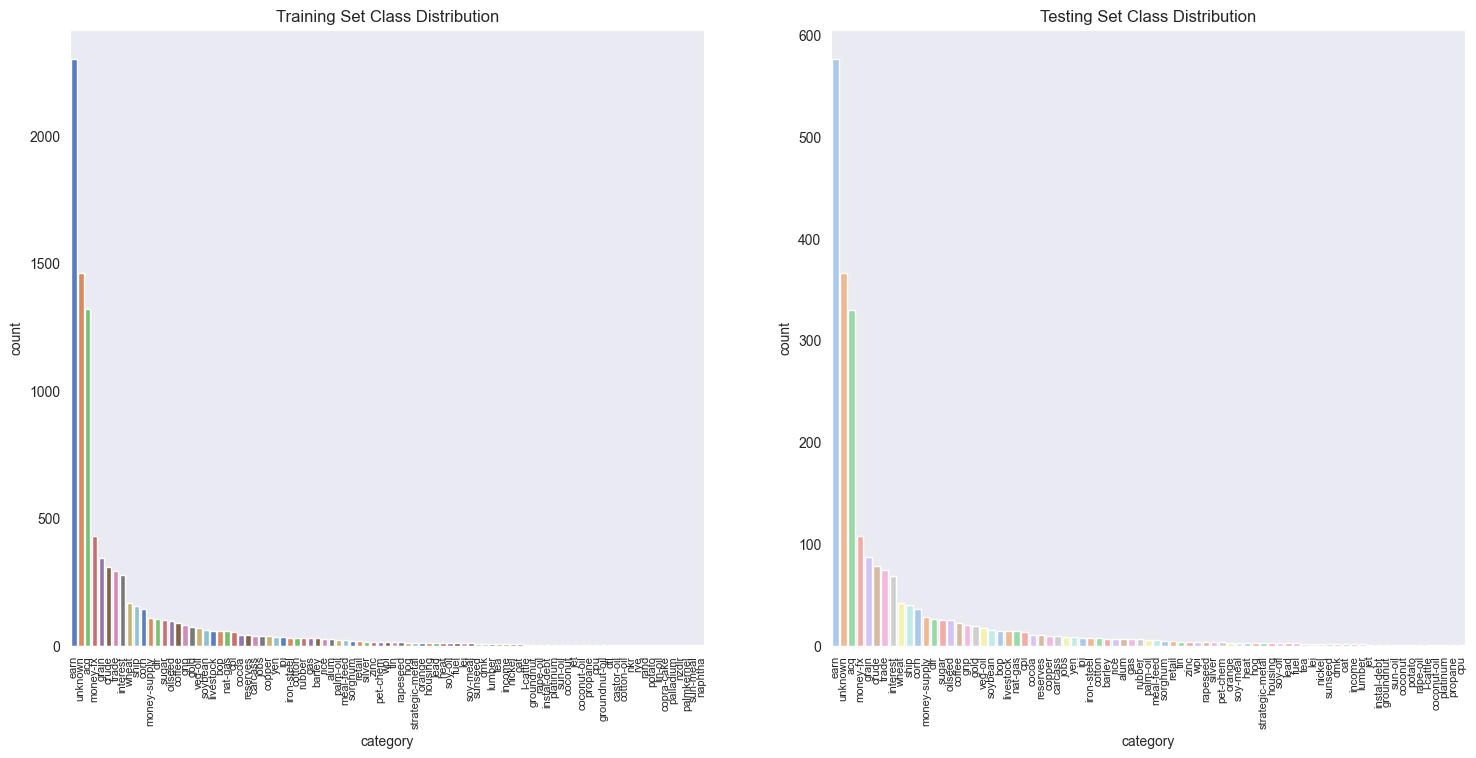

In [10]:
# Visualize the class distribution in y_train and y_test
plt.figure(figsize=(18, 8))

# Plot for y_train
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='category', palette='muted', order=train_data['category'].value_counts().index)
plt.title('Training Set Class Distribution')
plt.xticks(rotation=90, fontsize=8)

# Plot for y_test
plt.subplot(1, 2, 2)
sns.countplot(data=test_data, x='category', palette='pastel', order=test_data['category'].value_counts().index)
plt.title('Testing Set Class Distribution')
plt.xticks(rotation=90, fontsize=8) 

plt.show()

I will contonue with training dataset

# Preprocessing

In [11]:
train_data

,content,category
228,\n\r\nFED DATA INDICATE NO POLICY CHANGE LIKEL...,interest
5020,\n\r\nVOLCKER URGES GREATER EXCHANGE RATE STAB...,money-fx
7126,\n SAY NEW DOW COMPONENTS AID AVERAGE\r\n\n ...,unknown
6823,"\n\r\nEGYPT REJECTS VEG OIL OFFERS, TO RETENDE...",sun-oil
6785,\n\r\nU.S. SAID PROMISED BULK OF MAIZE EXPORT ...,corn
...,...,...
2530,\n\r\nHOLLY SUGAR CORP <HLY> SETS REGULAR DIVI...,earn
1690,\n\r\nOREGON LUMBER COMPANY TO SELL WOOD TO IR...,lumber
6752,\n\r\nUSSR CORN BUYING MAY BE 3.5 MLN TONNES--...,corn
5849,\n\r\nMORE HEAVY RAINS IN ARGENTINE GRAIN AREA...,grain


In [12]:
# remove any escape code
def reorganize_data(content_data) -> list:
    """Reorganize content and file name data.

    Args:
        content_data (Series): The data representing content.

    Returns:
        list: A list containing the reorganized content data.
    """
    content_data = content_data.str.replace(r'\s+', ' ', regex=True).str.strip()
    
    return content_data


train_data['content'] = reorganize_data(train_data['content'])

In [13]:
print(train_data.content[7111])

CORP <HIA> TO REDEEM TWO BOND ISSUES NEW YORK, March 2 - Holiday Corp said it would redeem on March 11 all outstanding 9-1/2 pct first mortgage bonds due 1995 of its Holiday Inns Inc unit and all 9-1/2 pct first mortgage bonds, Series A, due 1996 of its Harrah's subsidiary. The Holiday bonds will be bought back at 101.6 pct of the bonds' principal amount plus accrued interest, or 1,038.69 dlrs per 1,000 dlr face amount. Holiday will redeem the Harrah's bonds at 104.5 pct of the principal amount plus accrued interest, or 1,079.31 dlrs per 1,000 dlr face amount.


## Lowercasing

In [14]:
def lowercase_text(text) -> str:
    """Convert a string to lowercase.
    
    Args:
        text (str): The text to be converted.
    
    Returns:
        str: The converted lowercase string.
    """
    return text.lower()

train_data['lowercasing'] = train_data['content'].apply(lowercase_text)
train_data['lowercasing']

228     fed data indicate no policy change likely <aut...
5020    volcker urges greater exchange rate stability ...
7126    say new dow components aid average new york, m...
6823    egypt rejects veg oil offers, to retender lond...
6785    u.s. said promised bulk of maize export to spa...
                              ...                        
2530    holly sugar corp <hly> sets regular dividend c...
1690    oregon lumber company to sell wood to iraq por...
6752    ussr corn buying may be 3.5 mln tonnes--amstut...
5849    more heavy rains in argentine grain areas <aut...
309     fed expected to add reserves new york, march 2...
Name: lowercasing, Length: 9136, dtype: object

## Tokenize text

In [15]:
def tokenize_text(row) -> list:
    """Tokenize a string into words.
    
    Args:
        row (str): The text to be tokenized.
    
    Returns:
        list: A list of words from the tokenized text.
    """
    return word_tokenize(row)

train_data['tokenized'] = train_data['lowercasing'].apply(tokenize_text)

In [16]:
train_data['tokenized']

228     [fed, data, indicate, no, policy, change, like...
5020    [volcker, urges, greater, exchange, rate, stab...
7126    [say, new, dow, components, aid, average, new,...
6823    [egypt, rejects, veg, oil, offers, ,, to, rete...
6785    [u.s., said, promised, bulk, of, maize, export...
                              ...                        
2530    [holly, sugar, corp, <, hly, >, sets, regular,...
1690    [oregon, lumber, company, to, sell, wood, to, ...
6752    [ussr, corn, buying, may, be, 3.5, mln, tonnes...
5849    [more, heavy, rains, in, argentine, grain, are...
309     [fed, expected, to, add, reserves, new, york, ...
Name: tokenized, Length: 9136, dtype: object

In [17]:
def remove_special_chars(words) -> list:
    """Remove special characters from each word in a list of words.
    
    Args:
        words (list): A list of words to process.
    
    Returns:
        list: A list of words with special characters removed.
    """
    pattern = re.compile(r'[^\w.]+|(\'s)+')
    return [re.sub(pattern, '', word) for word in words]

train_data['clean_special'] = train_data['tokenized'].apply(remove_special_chars)
train_data['clean_special']

228     [fed, data, indicate, no, policy, change, like...
5020    [volcker, urges, greater, exchange, rate, stab...
7126    [say, new, dow, components, aid, average, new,...
6823    [egypt, rejects, veg, oil, offers, , to, reten...
6785    [u.s., said, promised, bulk, of, maize, export...
                              ...                        
2530    [holly, sugar, corp, , hly, , sets, regular, d...
1690    [oregon, lumber, company, to, sell, wood, to, ...
6752    [ussr, corn, buying, may, be, 3.5, mln, tonnes...
5849    [more, heavy, rains, in, argentine, grain, are...
309     [fed, expected, to, add, reserves, new, york, ...
Name: clean_special, Length: 9136, dtype: object

## Stop Words Removal

In [18]:
def remove_stopword(content) -> str:
    """Remove stopwords from a list of words.
    
    Args:
        content (list): A list of words from which stopwords are to be removed.
    
    Returns:
        list: A list of words with stopwords removed.
    """
    return [word for word in content if word not in stop_words_nltk]

train_data['clean_stopwords'] = train_data['clean_special'].apply(remove_stopword)

In [19]:
train_data['clean_stopwords']

228     [fed, data, indicate, policy, change, likely, ...
5020    [volcker, urges, greater, exchange, rate, stab...
7126    [say, new, dow, components, aid, average, new,...
6823    [egypt, rejects, veg, oil, offers, , retender,...
6785    [u.s., said, promised, bulk, maize, export, sp...
                              ...                        
2530    [holly, sugar, corp, , hly, , sets, regular, d...
1690    [oregon, lumber, company, sell, wood, iraq, po...
6752    [ussr, corn, buying, may, 3.5, mln, tonnes, , ...
5849    [heavy, rains, argentine, grain, areas, , auth...
309     [fed, expected, add, reserves, new, york, , ma...
Name: clean_stopwords, Length: 9136, dtype: object

## Lemmatization

In [20]:
def lemmatize_sentence(sentence) -> list:
    """Lemmatize each word in a list of words.
    
    Args:
        sentence (list): A list of words to be lemmatized.
    
    Returns:
        list: A list of lemmatized words.
    """
    return [lemmatizer.lemmatize(word) for word in sentence]

train_data['lemmatized'] = train_data['clean_stopwords'].apply(lemmatize_sentence)

In [21]:
train_data['lemmatized']

228     [fed, data, indicate, policy, change, likely, ...
5020    [volcker, urge, greater, exchange, rate, stabi...
7126    [say, new, dow, component, aid, average, new, ...
6823    [egypt, reject, veg, oil, offer, , retender, l...
6785    [u.s., said, promised, bulk, maize, export, sp...
                              ...                        
2530    [holly, sugar, corp, , hly, , set, regular, di...
1690    [oregon, lumber, company, sell, wood, iraq, po...
6752    [ussr, corn, buying, may, 3.5, mln, tonne, , a...
5849    [heavy, rain, argentine, grain, area, , author...
309     [fed, expected, add, reserve, new, york, , mar...
Name: lemmatized, Length: 9136, dtype: object

## Remove empty elements

In [22]:
def remove_extra_spaces(lst) -> list:
    """Remove extra spaces from each string in a list.
    
    Args:
        lst (list): A list of strings to process.
    
    Returns:
        list: A list of strings with extra spaces removed.
    """
    return [element for element in lst if element.strip()]

train_data['content_ready'] = train_data['lemmatized'].apply(remove_extra_spaces)
train_data['content_ready']

228     [fed, data, indicate, policy, change, likely, ...
5020    [volcker, urge, greater, exchange, rate, stabi...
7126    [say, new, dow, component, aid, average, new, ...
6823    [egypt, reject, veg, oil, offer, retender, lon...
6785    [u.s., said, promised, bulk, maize, export, sp...
                              ...                        
2530    [holly, sugar, corp, hly, set, regular, divide...
1690    [oregon, lumber, company, sell, wood, iraq, po...
6752    [ussr, corn, buying, may, 3.5, mln, tonne, ams...
5849    [heavy, rain, argentine, grain, area, author, ...
309     [fed, expected, add, reserve, new, york, march...
Name: content_ready, Length: 9136, dtype: object

## Remove periods elements

In [23]:
def remove_periods(words) -> list:
    """Remove any period element.

    Args:
        words (list): A list of words.

    Returns:
        list: A list of words without period elements.
    """
    return [word for word in words if len(word)!=1 and word!='.']

train_data['content_ready'] = train_data['content_ready'].apply(remove_periods)

In [31]:
train_data.to_csv('../data/train_data_cleaning.csv', columns=['content_ready', 'category'], index=False)

# Vocabulary Creation

In [25]:
vocabulary = [word for sublist in train_data['content_ready'] for word in sublist]
print(f"Samples: {vocabulary[:15]}\nlength of vocabulary: {len(vocabulary)}")

Samples: ['fed', 'data', 'indicate', 'policy', 'change', 'likely', 'author', 'martin', 'cherrin', 'reuters', 'author', 'new', 'york', 'march', '12']
length of vocabulary: 910916


In [26]:
# Remove duplicates words
vocabulary = list(set(vocabulary))

In [27]:
print(f"Samples: {vocabulary[:15]}\nlength of vocabulary: {len(vocabulary)}")

Samples: ['191.15', 'turner', 'overbuilding', '646.7', 'barometer', 'aprjun', '943938', '3.9375', 'francophone', 'scis', '3288000', 'precise', 'blown', '336', '119967']
length of vocabulary: 39400


In [28]:
np.savetxt("../data/vocabulary.txt",
           vocabulary,
           delimiter = ", ",
           fmt = '% s')

# Save Testing Data

In [32]:
test_data['content']= reorganize_data(test_data['content'])
test_data['lowercasing'] = test_data['content'].apply(lowercase_text)
test_data['tokenized'] = test_data['lowercasing'].apply(tokenize_text)
test_data['clean_special'] = test_data['tokenized'].apply(remove_special_chars)
test_data['clean_stopwords'] = test_data['clean_special'].apply(remove_stopword)
test_data['lemmatized'] = test_data['clean_stopwords'].apply(lemmatize_sentence)
test_data['content_ready'] = test_data['lemmatized'].apply(remove_extra_spaces).apply(remove_periods)

In [34]:
test_data.to_csv('../data/test_data_cleaning.csv', columns=['content_ready', 'category'], index=False)